# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team, JL2**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### <u>__Predict Overview: EA - Twitter Sentiment Classification 2023-2024__</u>

* To be continued


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Text Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Perfomance</a>

<a href=#eifght>8. Model Evaluation - Testing set</a>

<a href=#nine>9. Best Model Explanation</a>

# 1. Importing Packages


In [ ]:
# Libraries of loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Downloads
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

# Setting global constants to ensure notebook results are reproducible

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.Loading Data

In [ ]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test_with_no_labels.csv')

# 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [ ]:
# Shapes, Columns, Data types
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.2 Data Dimensionality

In [ ]:
df_train.shape

(15819, 3)

- `Train data` has **15819** rows and **3** columns.

In [ ]:
df_test.shape

(10546, 2)

- `Test data` has **10546** rows and **2** columns.

### 3.3 Information Summmary

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Notable insight for `Train data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **2** columns of Numeric type [`sentiment` & `tweetid`]
- **Null data**: Zero null values

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Notable insight for `Test data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **1** column of Numeric type [`tweetid`]
- **Null data**: Zero null values

### 3.4 Null value analysis

In [ ]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

- Both `train data` & `test data` have **ZERO** null values.

### 3.5 Sentiment Class Distribution

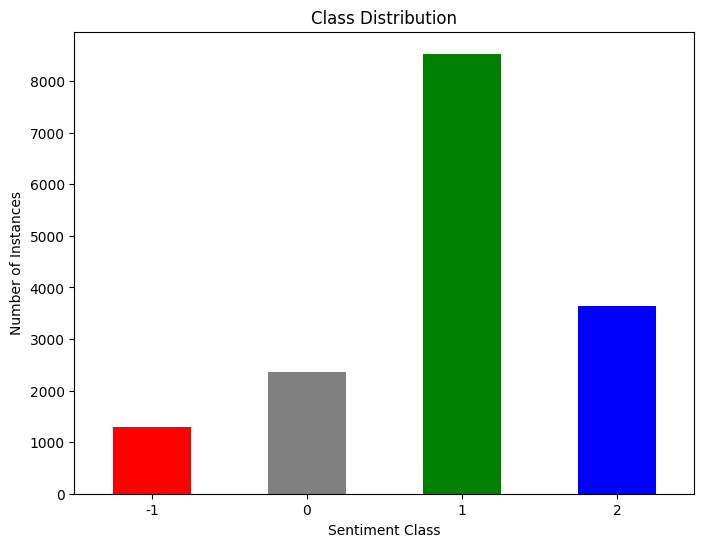

In [ ]:
# Define the color scheme
color_scheme = {'2': 'blue', '1': 'green', '0': 'grey', '-1': 'red'}

# Plot the class distribution
plt.figure(figsize=(8, 6))
df_train['sentiment'].value_counts().sort_index().plot(kind='bar', color=[color_scheme[str(i)] for i in range(-1, 3)])
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

- Notable differences exist in the number of instances for each sentiment class, with `Pro (class 1)` having the **highest** number of observations, and `Anti (class -1)` with the **lowest** number of observations.
- The imbalance in class frequencies may pose a potential challenge for our machine learning models.

### 3.6 Tweet Lengths Overview


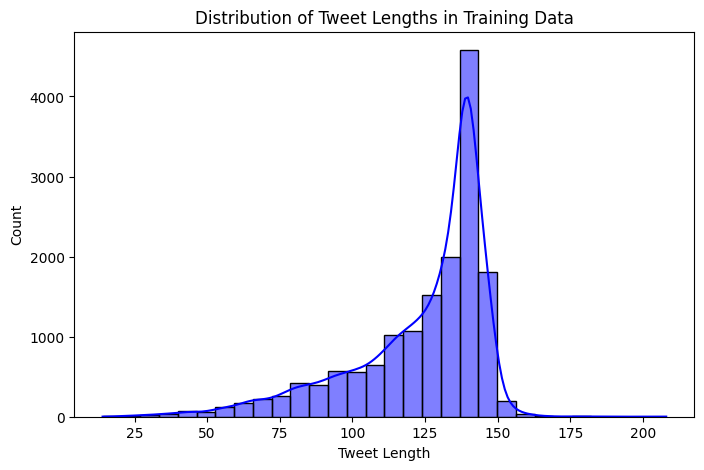

In [ ]:
# Analyze the length of tweets in training data without adding a new column
temp_message_length = df_train['message'].apply(len)

# Plot distribution of tweet lengths
plt.figure(figsize=(8, 5))
sns.histplot(temp_message_length, bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length')
plt.show()


- Comment!

# 4. Text Pre-Processing

#### Combine train & test data

In [ ]:
# Combine training and test data for preprocessing
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [ ]:
# Add a new column 'clean_message' with a copy of the original 'message' next to it
df_combined.insert(df_combined.columns.get_loc('message') + 1, 'clean_message', df_combined['message'].copy())

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_combined.shape

(26365, 4)

#### 4.1 Lowercasing

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].str.lower()

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt @rawstory: researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt @soynoviodetodas: it's 2016, and a racist, ...",466954


#### 4.2 Removing URLs and User(@)

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'http\S+', '', regex=True).replace(r'@[\w_]+', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt : researchers say we have three years to ac...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt : it's 2016, and a racist, sexist, climate ...",466954


#### 4.3 Removing Punctuation & Special Characters

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\w\s]', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt its 2016 and a racist sexist climate chang...,466954


#### 4.4 Remove RT

In [ ]:
# Replace 'RT' with an empty string in the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\brt\b', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.5 Remove Special Characters & Handle Encoding

In [ ]:
# Remove special characters (handling encoding issues)
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\x00-\x7F]+', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.6 Remove repeating characters

In [ ]:
def check_repeating_characters(dataframe, column_name='clean_message'):

    # Extract repeating characters from the specified column
    repeating_characters = dataframe[column_name].str.extract(r'((.)\2+)')

    # Check if any repeating characters were found
    repeating_characters_exist = not repeating_characters.isnull().all().all()

     # Print the result
    if repeating_characters_exist:
        print("Repeating characters exist in the '{}' column.".format(column_name))
    else:
        print("No repeating characters found in the '{}' column.".format(column_name))

In [ ]:
check_repeating_characters(df_combined)

Repeating characters exist in the 'clean_message' column.


In [ ]:
# Replace repeating characters with a single instance in the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'(.)\1+', r'\1', regex=True)

In [ ]:
check_repeating_characters(df_combined)

No repeating characters found in the 'clean_message' column.


#### 4.7 Remove numeric numbers

In [ ]:
# Remove numeric numbers from the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\d+', '', regex=True)

In [ ]:
# Filter rows where 'message' column had numbers
rows_with_numbers = df_combined[df_combined['message'].str.contains(r'\d+')]

# Display a sample of rows with 'message' and 'clean_message'
sample_rows_with_numbers = rows_with_numbers.sample(5)

sample_rows_with_numbers[['message', 'clean_message']]

,message,clean_message
12077,Biden urges Canada to fight climate change des...,biden urges canada to fight climate change des...
3261,"Winter really lasted about 18 days, but global...",winter realy lasted about days but global war...
21244,RT @Xeno_lith: Teaching climate change to teac...,teaching climate change to teachers today ice...
7312,Seacoast Online advances Wells Reserve climate...,seacoast online advances wels reserve climate ...
23581,RT @Independent: Even Nasa scientists are tryi...,even nasa scientists are trying to convince d...


#### 4.9 Remove Stopwords

In [ ]:
# A set of stop words
STOPWORDS = set(stopwords.words('english'))

# Function to clean stopwords from text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
# Apply the function to the 'clean_message' column of df_combined
df_combined['clean_message'] = df_combined['clean_message'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say thre years act climate change ...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired pivotal year war climate ch...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",racist sexist climate change denying bigot lea...,466954


### 4.10 Normalization

#### 4.10.1 Tokenization

In [ ]:
# Function to tokenize a sentence
def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence)
    return tokens


In [ ]:
# Apply tokenization to the 'message' column in df_train
df_combined['tokens'] = df_combined['clean_message'].apply(tokenize_sentence)

# Reorder columns to have 'tokenized_clean_message' next to 'clean_message'
df_combined[['clean_message', 'tokens', 'sentiment']]

In [ ]:
df_combined.head()

In [ ]:
df_combined.info()

#### 4.10.2 Stemming

In [ ]:
# Function to perform stemming on a sentence
def stem_sentence(sentence):
    stemmer = PorterStemmer()
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
# Apply stemming to the 'tokens' column in df_combined
df_combined['stemms'] = df_combined['tokens'].apply(lambda tokens: [stem_sentence(token) for token in tokens])

# Reorder columns to have 'stemms' next to 'tokens'
df_combined = df_combined[['tweetid','message','clean_message', 'tokens', 'stemms','sentiment']]

In [ ]:
df_combined[['tokens', 'stemms']].tail()

In [ ]:
df_combined.columns

In [ ]:
from wordcloud import WordCloud

positive_words = ' '.join(df_combined[df_combined['sentiment'] == 1]['clean_message'])
negative_words = ' '.join(df_combined[df_combined['sentiment'] == -1]['clean_message'])

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')

plt.show()

In [ ]:
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [ ]:
# Preprocess the 'stemms' column to convert lists to arrays
df_train['stemms'] = df_train['stemms'].apply(lambda x: np.array(x))

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(df_train['stemms'], df_train['sentiment'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', rf_classifier),
])

# Fit the model on the training data
pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
y_pred = pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)

Accuracy: 0.7089

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      0.22      0.35       278
         0.0       0.55      0.32      0.41       425
         1.0       0.71      0.89      0.79      1755
         2.0       0.75      0.68      0.71       706

    accuracy                           0.71      3164
   macro avg       0.71      0.53      0.57      3164
weighted avg       0.71      0.71      0.68      3164



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Create a pipeline with TF-IDF vectorizer and Logistic Regression classifier
logreg_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', logreg_classifier),
])

# Fit the model on the training data
logreg_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
logreg_y_pred = logreg_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_validation, logreg_y_pred)
logreg_classification_rep = classification_report(y_validation, logreg_y_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}\n')
print('Logistic Regression Classification Report:\n', logreg_classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7266

Logistic Regression Classification Report:
               precision    recall  f1-score   support

        -1.0       0.76      0.31      0.44       278
         0.0       0.60      0.36      0.45       425
         1.0       0.73      0.89      0.80      1755
         2.0       0.75      0.71      0.73       706

    accuracy                           0.73      3164
   macro avg       0.71      0.57      0.60      3164
weighted avg       0.72      0.73      0.71      3164



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', svm_classifier),
])

# Fit the model on the training data
svm_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
svm_y_pred = svm_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_validation, svm_y_pred)
svm_classification_rep = classification_report(y_validation, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy:.4f}\n')
print('SVM Classification Report:\n', svm_classification_rep)


SVM Accuracy: 0.7301

SVM Classification Report:
               precision    recall  f1-score   support

        -1.0       0.73      0.37      0.49       278
         0.0       0.59      0.41      0.49       425
         1.0       0.74      0.86      0.80      1755
         2.0       0.75      0.74      0.74       706

    accuracy                           0.73      3164
   macro avg       0.70      0.60      0.63      3164
weighted avg       0.72      0.73      0.72      3164



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline with TF-IDF vectorizer and KNN classifier
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', knn_classifier),
])

# Fit the model on the training data
knn_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
knn_y_pred = knn_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_validation, knn_y_pred)
knn_classification_rep = classification_report(y_validation, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy:.4f}\n')
print('KNN Classification Report:\n', knn_classification_rep)

KNN Accuracy: 0.6321

KNN Classification Report:
               precision    recall  f1-score   support

        -1.0       0.50      0.42      0.46       278
         0.0       0.38      0.41      0.39       425
         1.0       0.73      0.72      0.72      1755
         2.0       0.60      0.64      0.62       706

    accuracy                           0.63      3164
   macro avg       0.55      0.55      0.55      3164
weighted avg       0.64      0.63      0.63      3164



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the SVM
param_grid = {
    'clf__C': [0.1, 1, 10],  # Regularization parameter
    'clf__kernel': ['linear', 'rbf'],  # Kernel type
}

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(random_state=42)),
])

# Create GridSearchCV object
svm_grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data with grid search
svm_grid_search.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Get the best parameters from the grid search
best_params = svm_grid_search.best_params_

# Print the best parameters
print(f'Best Parameters: {best_params}')

# Predictions on the validation set using the best model
svm_grid_search_y_pred = svm_grid_search.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the model after grid search
svm_grid_search_accuracy = accuracy_score(y_validation, svm_grid_search_y_pred)
svm_grid_search_classification_rep = classification_report(y_validation, svm_grid_search_y_pred)

print(f'SVM with Grid Search Accuracy: {svm_grid_search_accuracy:.4f}\n')
print('SVM with Grid Search Classification Report:\n', svm_grid_search_classification_rep)


Best Parameters: {'clf__C': 10, 'clf__kernel': 'rbf'}
SVM with Grid Search Accuracy: 0.7408

SVM with Grid Search Classification Report:
               precision    recall  f1-score   support

        -1.0       0.78      0.37      0.51       278
         0.0       0.62      0.40      0.48       425
         1.0       0.74      0.89      0.81      1755
         2.0       0.77      0.72      0.75       706

    accuracy                           0.74      3164
   macro avg       0.73      0.60      0.64      3164
weighted avg       0.74      0.74      0.73      3164



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a Naive Bayes classifier (Multinomial Naive Bayes for text classification)
naive_bayes_classifier = MultinomialNB()

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', naive_bayes_classifier),
])

# Fit the model on the training data
naive_bayes_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
naive_bayes_y_pred = naive_bayes_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Naive Bayes model
naive_bayes_accuracy = accuracy_score(y_validation, naive_bayes_y_pred)
naive_bayes_classification_rep = classification_report(y_validation, naive_bayes_y_pred)

print(f'Naive Bayes Accuracy: {naive_bayes_accuracy:.4f}\n')
print('Naive Bayes Classification Report:\n', naive_bayes_classification_rep)


Naive Bayes Accuracy: 0.6542

Naive Bayes Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.02      0.04       278
         0.0       0.87      0.06      0.12       425
         1.0       0.62      0.97      0.76      1755
         2.0       0.86      0.46      0.60       706

    accuracy                           0.65      3164
   macro avg       0.80      0.38      0.38      3164
weighted avg       0.73      0.65      0.58      3164



In [ ]:
pip install imbalanced-learn


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming you have your X_train, X_validation, y_train, y_validation already defined

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create an undersampler
undersampler = RandomUnderSampler(random_state=42)

# Create a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Fit the undersampler on the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train.apply(lambda x: ' '.join(x)).values.reshape(-1, 1), y_train)

# Flatten the resampled data
X_resampled = [item for sublist in X_resampled for item in sublist]

# Transform the resampled data using TF-IDF vectorizer
X_resampled_tfidf = tfidf_vectorizer.fit_transform(X_resampled)

# Fit the Naive Bayes classifier on the resampled and transformed data
naive_bayes_classifier.fit(X_resampled_tfidf, y_resampled)

# Transform the validation set using TF-IDF vectorizer
X_validation_tfidf = tfidf_vectorizer.transform(X_validation.apply(lambda x: ' '.join(x)))

# Predictions on the validation set
y_pred = naive_bayes_classifier.predict(X_validation_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)


Accuracy: 0.6141

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.34      0.70      0.46       278
         0.0       0.41      0.41      0.41       425
         1.0       0.82      0.58      0.68      1755
         2.0       0.60      0.78      0.67       706

    accuracy                           0.61      3164
   macro avg       0.54      0.62      0.56      3164
weighted avg       0.67      0.61      0.62      3164



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming you have your X_train, X_validation, y_train, y_validation already defined

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create an undersampler
undersampler = RandomUnderSampler(random_state=42)

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the undersampler on the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train.apply(lambda x: ' '.join(x)).values.reshape(-1, 1), y_train)

# Flatten the resampled data
X_resampled = [item for sublist in X_resampled for item in sublist]

# Transform the resampled data using TF-IDF vectorizer
X_resampled_tfidf = tfidf_vectorizer.fit_transform(X_resampled)

# Fit the Logistic Regression classifier on the resampled and transformed data
logreg_classifier.fit(X_resampled_tfidf, y_resampled)

# Transform the validation set using TF-IDF vectorizer
X_validation_tfidf = tfidf_vectorizer.transform(X_validation.apply(lambda x: ' '.join(x)))

# Predictions on the validation set
y_pred = logreg_classifier.predict(X_validation_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)

Accuracy: 0.6100

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.38      0.64      0.48       278
         0.0       0.37      0.56      0.45       425
         1.0       0.84      0.55      0.67      1755
         2.0       0.60      0.77      0.68       706

    accuracy                           0.61      3164
   macro avg       0.55      0.63      0.57      3164
weighted avg       0.68      0.61      0.62      3164



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming you have your X_train, X_validation, y_train, y_validation already defined

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create an undersampler
undersampler = RandomUnderSampler(random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the undersampler on the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train.apply(lambda x: ' '.join(x)).values.reshape(-1, 1), y_train)

# Flatten the resampled data
X_resampled = [item for sublist in X_resampled for item in sublist]

# Transform the resampled data using TF-IDF vectorizer
X_resampled_tfidf = tfidf_vectorizer.fit_transform(X_resampled)

# Fit the SVM classifier on the resampled and transformed data
svm_classifier.fit(X_resampled_tfidf, y_resampled)

# Transform the validation set using TF-IDF vectorizer
X_validation_tfidf = tfidf_vectorizer.transform(X_validation.apply(lambda x: ' '.join(x)))

# Predictions on the validation set
y_pred = svm_classifier.predict(X_validation_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)


Accuracy: 0.6141

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.38      0.63      0.47       278
         0.0       0.36      0.57      0.44       425
         1.0       0.84      0.56      0.67      1755
         2.0       0.63      0.77      0.69       706

    accuracy                           0.61      3164
   macro avg       0.55      0.63      0.57      3164
weighted avg       0.69      0.61      0.63      3164



# 5. Feature Engineering

## Modeling preparation

In [ ]:
# Feature Selection, Data Split, Data Scaling etc

# 6. Model Training

In [ ]:
# Train Models

# 7. Model Perfomance

In [ ]:
# Use various Metrics to evaluate each model's perfomance

# 8. Model Evaluation - Testing set

In [ ]:
# Evaluate the best model on the testing set

# 9. Best Model Explanation

# Submission

In [ ]:
# Create a submission file